<a href="https://colab.research.google.com/github/FelixEbenezer/ML_DataSicence_IA_Business/blob/main/DS_Business_Vente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BUT: on applique un IA sur les paniers des clients pour pouvoir faire des previsions des ventes au futur. Sur ce on va utiliser les series temporelles
#avec la framework de facebook appelée PROPHET
#On pourra aussi faire des previsions a part sur les ventes, mais aussi sur le nbre de clients par jour dans une boutique
#RAPPEL: ON parle d ici de series temporelles puisque nos previsions sont faites sur la base de temps selon une variable dans notre cas vente ou nbre de cliente.
#Ce qui est différent du modele d algo que on a appliqué dans le derparment de RH ou on voulait simplement predire si un client va ou pas rester dans l entreprise
#DONC, UNE PREDICTION D UNE VARIABLE EN FONCTION DE TEMPS equivaut à une SERIE TEMPORELLE

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
path = '/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios-20220517T094434Z-001.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

1. IMPORT DE LA PREMIERE BASE : VENTES

In [4]:
sales_train_df = pd.read_csv('/content/Ciência de Dados para Empresas e Negócios/Bases de dados/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
sales_train_df.shape

(1017209, 9)

In [ ]:
from pandas.core.dtypes.cast import construct_1d_arraylike_from_scalar
#En faisant, unique sur certaines colonnes comme par exemple: sales_train_df['Open'].unique(), on peut dire que :
- DayOfWeek: va de 1 a 6
- Open : 1 si la boutique est ouverte, 0 au cas contraire 
- Promo : 1 si il y a promotion et 0 au cas contraire 
- StateHolidays: 0 si c est pas férie, a, b,c si c est ferie de paques, noel, ..
- SchollHoliday: 1 si c est une ferié scolaire et 0 cas contraire 

In [ ]:
#On peut faire d autres operations sur la dataset comme: describe, info, columns, ...

# 2. IMPORT DE LA 2me BASE: BOUTIQUE

In [7]:
store_info_df = pd.read_csv('/content/Ciência de Dados para Empresas e Negócios/Bases de dados/store.csv')

In [8]:
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
store_info_df.shape

(1115, 10)

In [ ]:
#On peut faire d autres operations sur la dataset comme: describe, info, columns, ...

# 3. ANALYSE EXPLORATOIRE DE DONNÉES

#a) La base de Vente

In [ ]:
#On fait donc les operations habitulles avec des visualisations

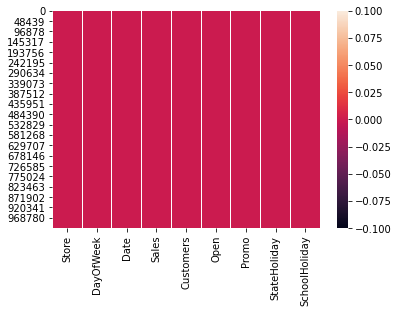

In [ ]:
sns.heatmap(sales_train_df.isnull());

In [ ]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe9451940>,
      dtype=object)

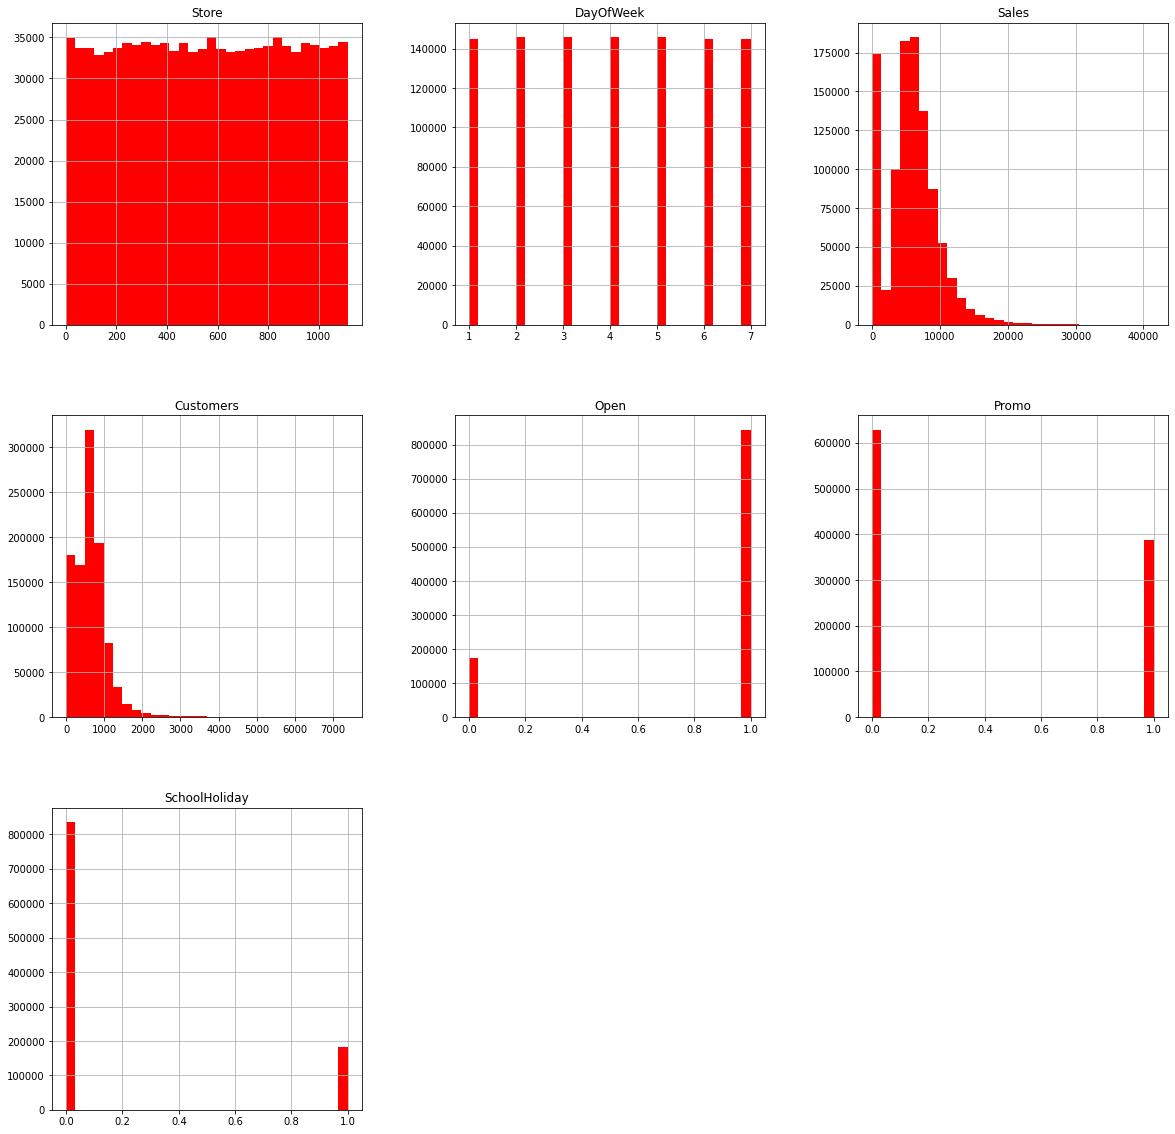

In [ ]:
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r')

In [ ]:
sales_train_df['Customers'].max()

7388

In [ ]:
#ON CREE 2 SOUS DATASET SELON QUE LA BOUTIQUE EST OUVERTE OU FERMÉE

In [10]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [11]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [12]:
172817 / len(store_info_df)

154.99282511210762

In [ ]:
C) ANALYSE DE LA DATASET CLOSED quand la boutique est fermée

In [13]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [ ]:
#OBS: On voit que quand la boutique est fermée, il n y a ni sales, ni customers ce qui rend cette dataset inutile pour notre étude.
#ON va donc baser notre étude simplement sur l autre dataset quand notre boutique est ouverte

In [ ]:
D) ANALYSE DE LA DATSET 2 QUAND LA BOUTIQUE EST OUVERTE 

In [14]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [15]:
sales_train_df.shape

(844392, 9)

In [16]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [17]:
#On obseerve que la colonne OPEN a la valeur 1 pour tous les enristrements cad la boutique est ouverte pour tous, on peut donc carrement suprrimer cette colonne
sales_train_df.drop(['Open'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [19]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


#b) La base de la Boutique

In [ ]:
#Analyse des valeurs manquantes

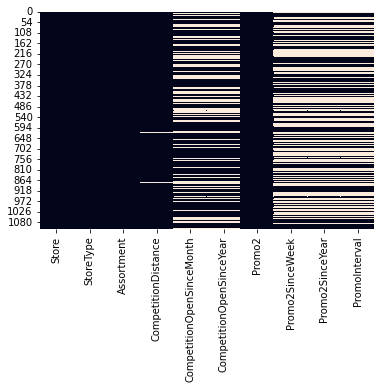

In [20]:
import seaborn as sns
sns.heatmap(store_info_df.isnull(), cbar=False);

In [21]:
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#On remarque qu on a plusieres colonnes avec des valeurs nulles. La question qui se pose, doit on les eliminer ou les remplacer par des 0 par des Mean?
#Pour ce genre de probleme, les éliminer compromettrait l integrité de notre analyse. 
#Et on remarque les valeurs contenues dans CompetitionDistance sont d´une autre nature (grands chiffres) par rapport aux autres tels Promo2, CompetitionOpenSince...
#qui sont des variables proches de 0 que vers de grans chiffres.
#On va donc procéder de la manière suivate:
#- les valeurs manquantes de CompetitionDistance seront remplacées par MEAN
#- et de toutes les autres colonnes par 0

In [22]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [23]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

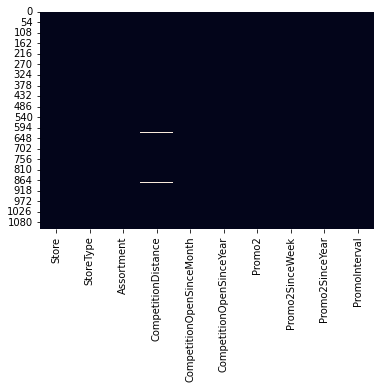

In [25]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [26]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

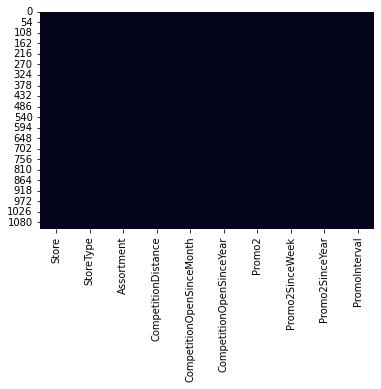

In [27]:
sns.heatmap(store_info_df.isnull(), cbar = False);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47c9d911d0>,
      dtype=object)

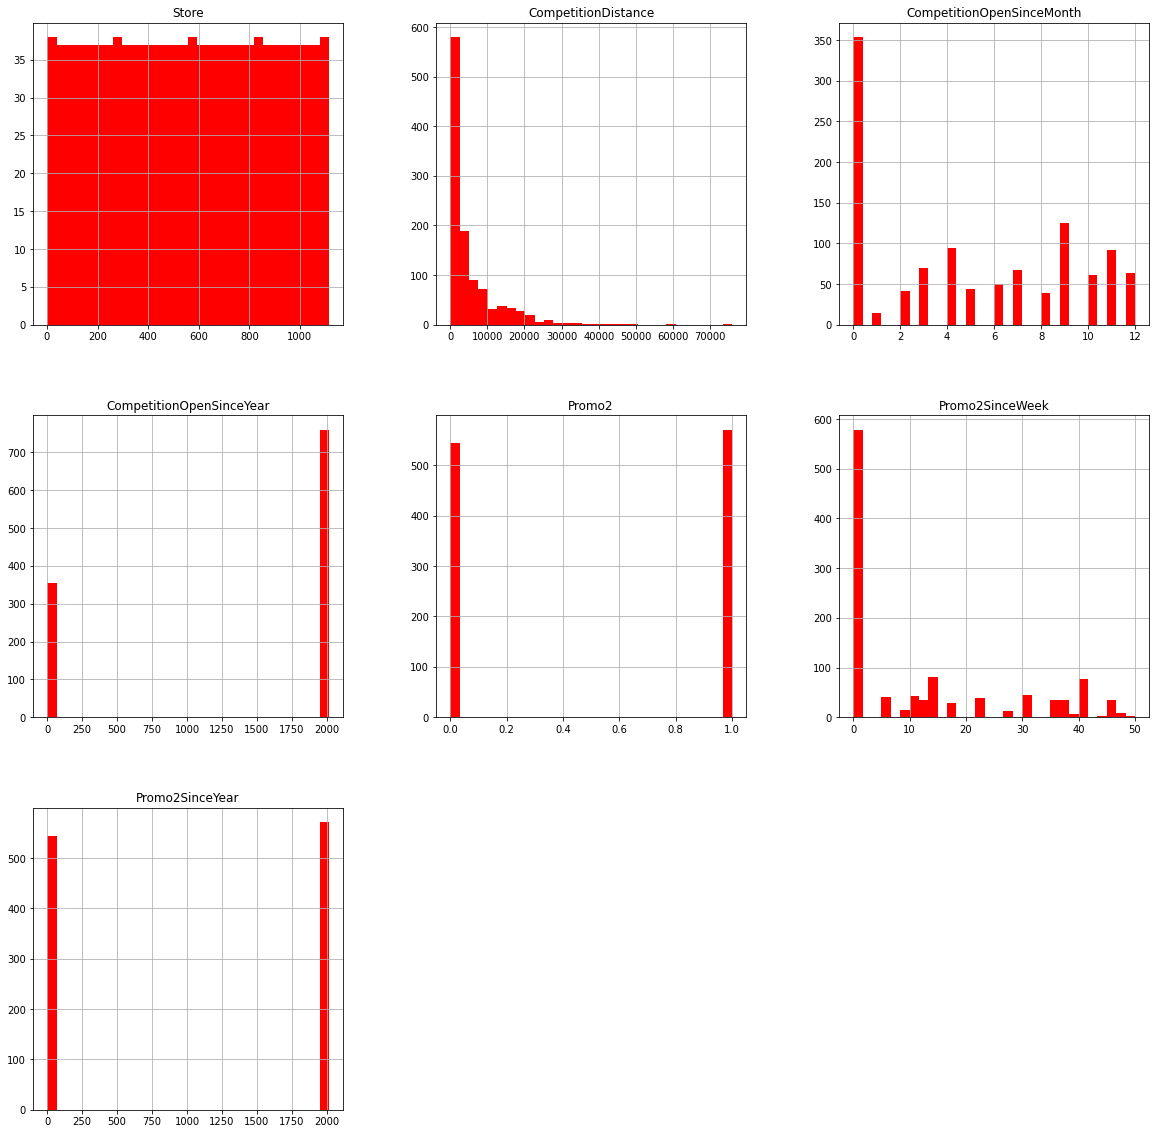

In [28]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

# c) Union de 2 Bases

In [29]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [30]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [31]:
#On voit que les 2 datsets ont la meme colonne store, donc on va faire la jonction de ces 2 colonnes sur la base de la colonne soter, comme en sql avec la 
#commande inner join, en python, on le fait dans merge avec how and on:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [32]:
sales_train_all_df.shape

(844392, 17)

In [33]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [ ]:
#On voit que dans store, pour un meme boutique de numero x, il y a plusieurs operations differentes faites, donc plus tard on pourra agrouper nos donnees par
#rapport a chacune de store

In [ ]:
#on peut faire les correlations entre toutes les colonnes, tout en rappelant que les valeurs de correlation va de -1 a 1, plus la valeur tend vers -1, moins
#la correlation existe entre les 2 colonnes, et l inverse dans le cas contraire

In [35]:
import matplotlib.pyplot as plt

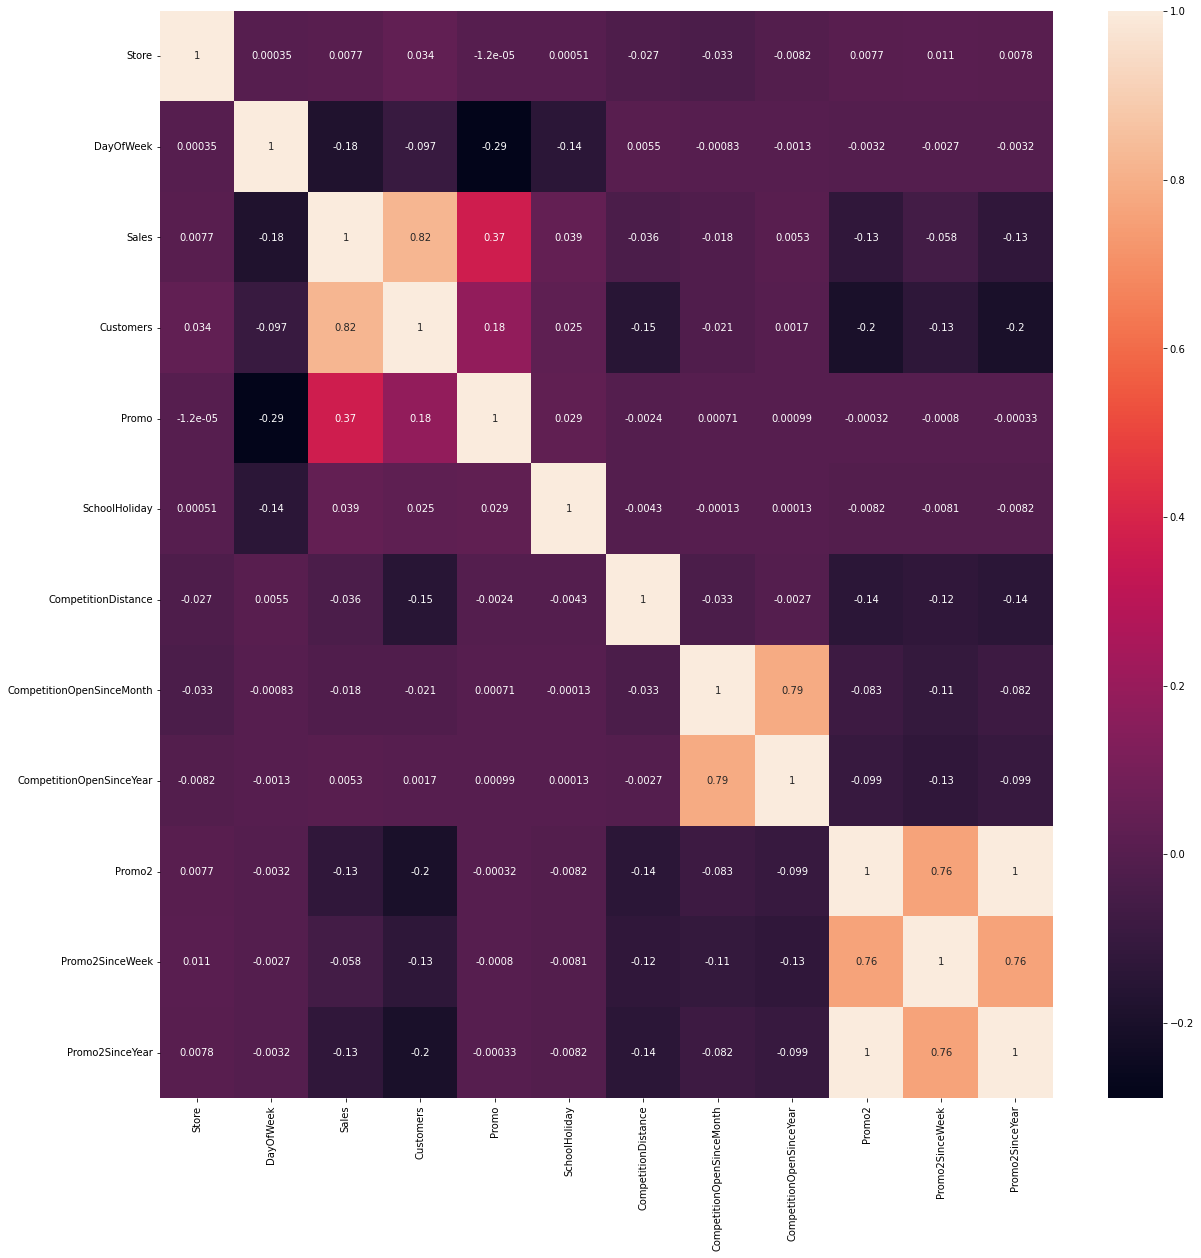

In [36]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

In [37]:
#CORRELATIONS en chiffres de TOUES LES COLONNES PAR RAPPORT a une seule colonne VENTE 
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations #On peut voir par exemple plus le nbre de customers est eleve, plus consequent sont les ventes, idem avec promo..et moins pour les autres 

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [46]:
sales_train_all_df.to_csv('sales_train_all.csv')

# d) Representation groupée de certaines colonnes en fonction de Vente par Anné, Mois ou Jour

In [ ]:
#Le but est de vouloir par exemple voir l evolution de la moyenne de ventes selon le nbre de clients par annee,  ou mois...
#Ou la moyenne de ventes selon la promo par mois, jour...

In [62]:
#Avant cela on doit verifier si la colonne Date de notre dataset est vrai en format en date, si non on devrait le convertir en DateTime
#n regardant bien notre colonne Date, ses valeurs sont deja dans un bon format, donc pas ncessaire de le convertir encore en datetime
sales_train_all_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
#COMME on souhaite faire les representations groupées par annee, mois et jour, on doit donc extraire ces donnees de la colonne Date et les ajouter dans notre datatset

In [63]:
#1. Extraction de l année dans Date
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [64]:
#2. Extraction du mois et jour

In [67]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [68]:
sales_train_all_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30


Representation groupée de la moyenne (mean) des ventes par mois

Text(0.5, 1.0, 'Média de vendas por mês')

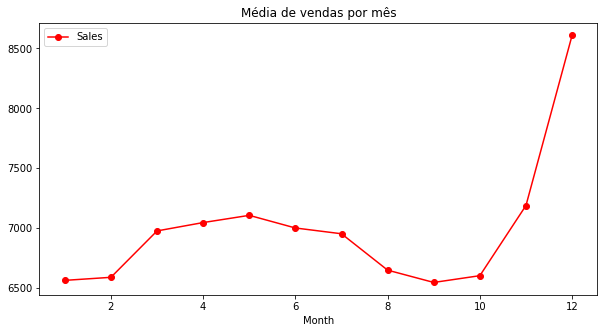

In [69]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

In [ ]:
#On voit sur le graphique ci haut que la moyenne des ventes par mois varie selon les mois, donc le department de la vente peut se servir de ce graphique pour
#prevenir augmenter le stock quand la moyenne de ventes est elevée

\Representation groupée de la moyenne (mean) des nbre de clients par mois

Text(0.5, 1.0, 'Média de clientes por mês')

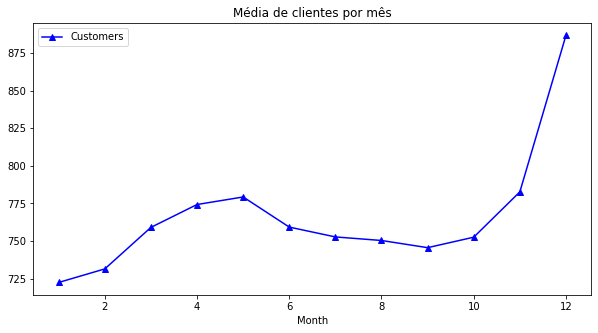

In [70]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Autres representations groupées

Text(0.5, 1.0, 'Média de vendas por dia')

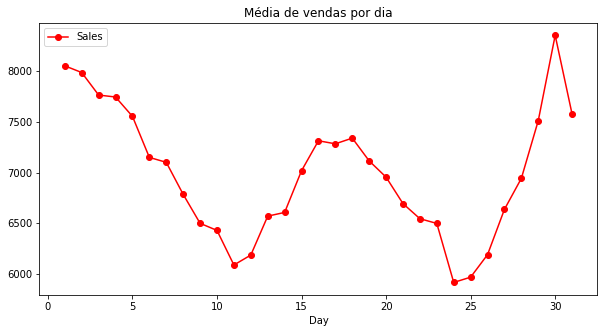

In [71]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

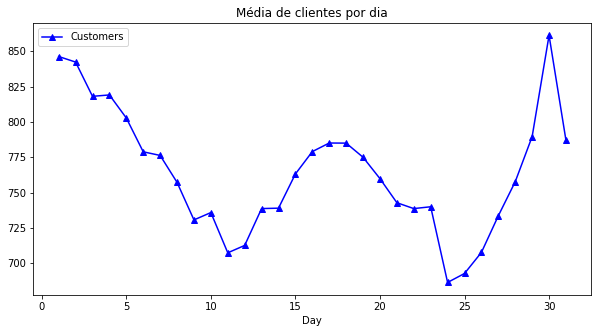

In [72]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

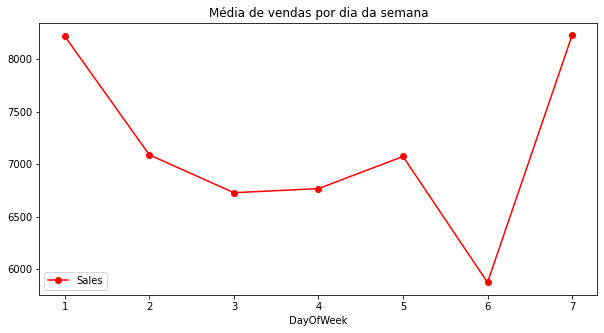

In [74]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

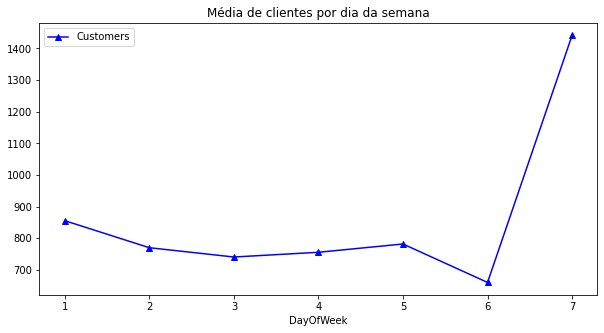

In [75]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

Representation groupée de la moyenne des ventes selon la Date et la type de boutique

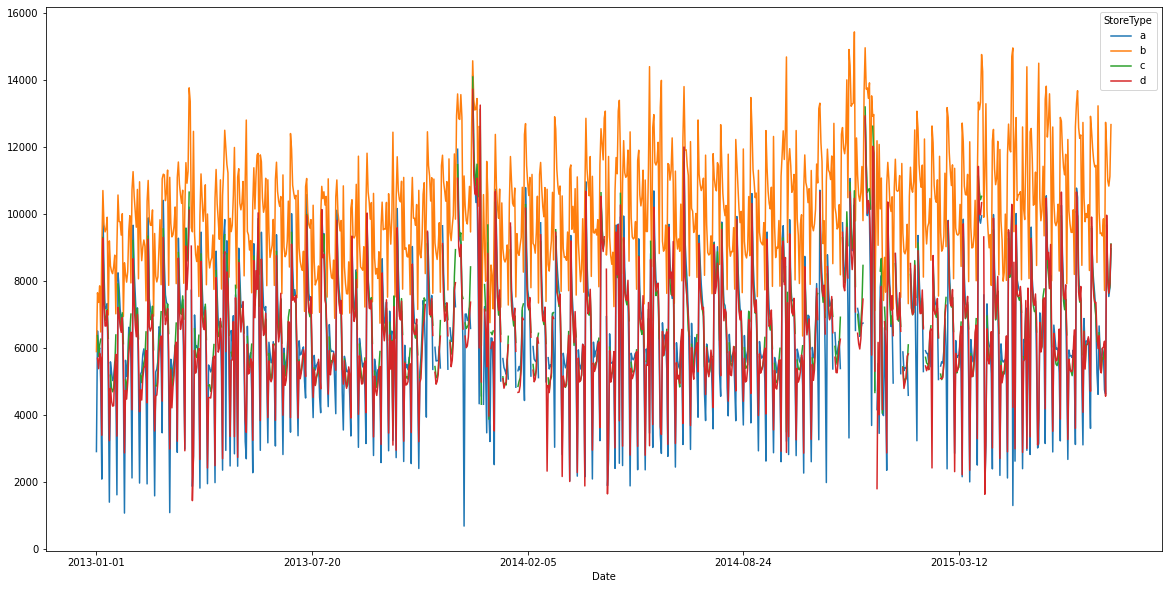

In [76]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

Comparaison de données entre 2 colonnes avec boxplot

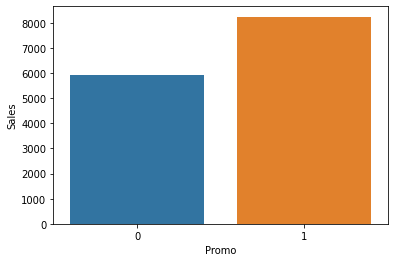

In [77]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

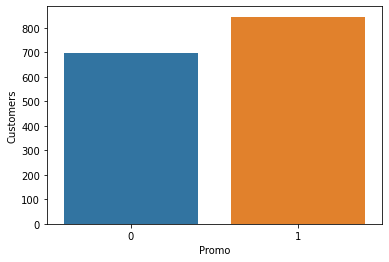

In [78]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

In [3]:
import pandas as pd

In [6]:
sales_train_all_df=pd.read_csv('/content/sales_train_all.csv')

In [7]:
sales_train_all_df

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


# 4. ENTRAINEMENT DU MODELE POUR LA SERIE TEMPORELLE AVEC PROPHET

In [ ]:
#Facebook PROPHET est la bibliothqhe que facebook utilis pour faire ses previsions temporelles
#Il est basé sur la regression aditive: 
#tendances non linéaires peuvent être anuellement, mensuellement ou journalierement, il tient en compte les fériés (comme par exemple Black Friday) alors
#que d autres bibliotheques de series temporelles considerent par exemple les feriés comme outliners,,,
#Il fonctionne meilleur avec les effets saisionniers et une grande quantité de données

In [ ]:
!pip install fbprophet

In [2]:
from fbprophet import Prophet

In [ ]:
#L´idée est de faire des previsions de vente pour une boutique donné (pour l instant) et pour une certaine periode.
#Donc on aura besoin de 3 choses: store_id, sales and Date 
#Sur ce on va construire notre modele atravers d une fonction à laquelle on passera notre dataset
#Facebook Prophet nous oblige à renommer les données les plus importantes qui sont Date en ds et Sales en y

In [12]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id] #Pour ne recupere que les donnes de dataset qui corresppndent a store_id
  #C est obligatoire de renommer les données les plus importantes qui sont Date en ds et Sales en y
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')
  #Jusqu ici notre dataset sales_df aura que 2 colonnes: ds et y, et justement sur ces colonnes que nous allons créer
  #Et entrainer notre modele avec Prophet

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast #Notre fonction va retourner et la dataset de 2 colonnes ds et y, et celuir des previsions

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


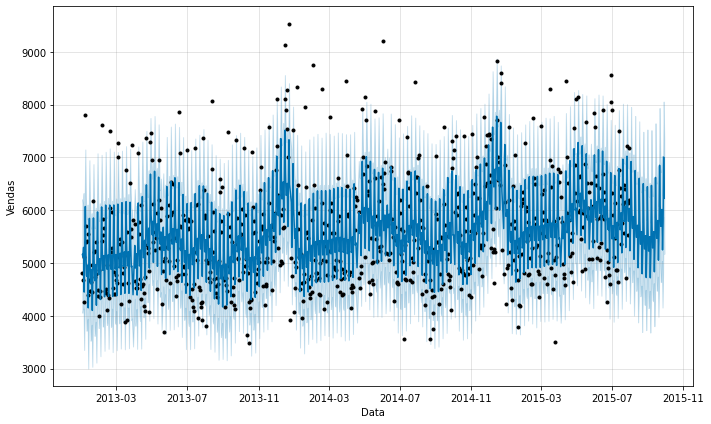

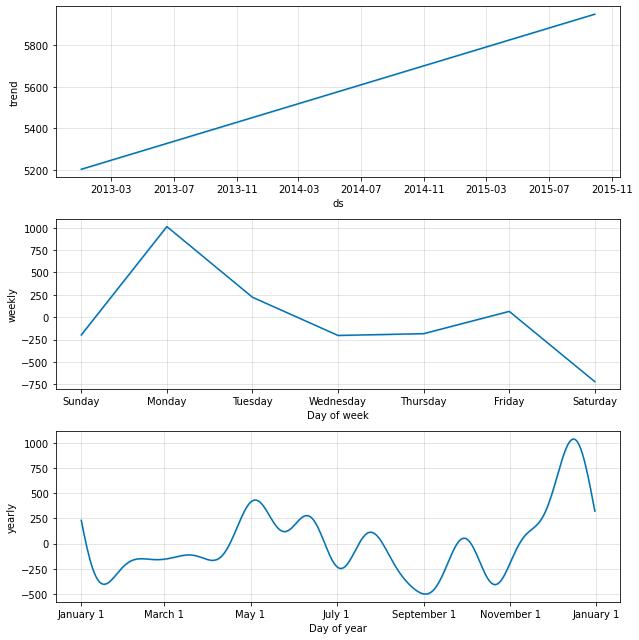

In [13]:
#On va donc essayer de faire les previsions des ventes pour la boutique 10 pendant 60 jours 
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)
#COMPRENHENSION DU GRAPHIQUE
#- les points noirs representent les ventes (y) par rapport au Date (ds) contenus dans df_origin, cad les données actuelles
#et on remarque que ces points commencent depuis 2013-03 a plus ou moins2015-07
#et ce apres ces dates, on a pas de points, ce qui constitue notre predictions de 2 mois
#On a le 2eme graphique qui est celui des tendances toujours selon les dates
#On a aussi les tendances par semaine et année comme on l avait dit que PROPHET fonctionne avec saisonalité

In [14]:
df_origin.shape, df_prediction.shape #On voit donc que notre df_origin a 784 lignes et celui de prediction 844 donc +60 jours

((784, 2), (844, 19))

In [ ]:
#On peut comparer les 2 Datasets pour mieux voir la difference

In [ ]:
#1. df_origin a pour les dates qui vont de 2013-01-02 avec ses ventes (4812) et terminent en 2015-07-31

In [19]:
df_origin.head(2)

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675


In [20]:
df_origin.tail(2)

,ds,y
7037,2015-07-30,6186
7036,2015-07-31,7185


In [ ]:
#2. df_predictions doit avoir +60 jours donc doit commencer de 2015-08-01 jusqu au 2015-09-29
#Du coup en faisant df_prediction.head(), on verra toujours les donnes de df_origin car df_predictions a d abord les donnees
#de df_orgin et mes les données de predictions à la fin

In [21]:
df_prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4056.423123,6209.252517,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4113.050004,6131.716334,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752


In [17]:
#Donc si on veut voir toutes les données de la prediction, on fait tail(60)
#ETUDES DE QUELQUES COLONNES IMPORTANTES AJOUTÈES PAR FACEBOOK PROPHET:
#Yhat: la dernière colonne est bien les ventes predites
#TREND: et apres vous avez aussi le trens pour les tendances de ventes futures
#En meme temps, vous avez d autres colonnes comme poiur les tendances en semaine, year , les minim, entre autres
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4232.410296,6251.272129,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4676.004449,6754.884589,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,5929.878493,7952.810910,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,4972.364484,7171.953317,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4635.978541,6728.552481,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4731.609675,6780.594604,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4858.928443,7056.520868,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,4003.806011,6166.032950,5909.964567,5909.964567,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4516.887605,6599.812405,5910.708885,5910.708893,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5710.348003,7784.370031,5911.453199,5911.453221,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


In [ ]:
#Et du coup on doit envoyer ces données au department de vente pour voir les previsions préconisées

In [18]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')